# **Global Biomes and Ecoregions Assessment**
<span style = "font-size: 1.5em;"> ***RESOLVE Biome and Ecoregion Dataset in 2017*** </span>

## Brief Description

### <span style = "font-size: 1em;"> ***Brief Description of The Asssessment*** </span>

The assessment will estimate the spatial distribution of ecoregions and biomes area in the region of interest  in 2017. 

<span style="font-size:1.1em;"> ***Input Data Needed*** </span>
- Shapefile
> - **roi_directory** : specify region of interest shapefiile
> - **ecoregions_directory** : select the global biomes and ecoregions shapefile

- Input Data Variables
> - **projectname (string)** : project name (example: "RVL_IDN_KubuRaya")
> - **projection**: UTM projection code in code (example: "EPSG:3857")
> - **roi_column_name** : variable name that specifiy unique ID for multipolygon analysis (example: "Name")

- Output directory folder
> - **output_directory** : select directory folder to put the output result

<span style="font-size:1.1em;"> ***Expected Output*** </span>
- Shapefile dataset
> - Biomess and Ecoregions Shapefile

- csv, graph and maps 
> - Biomes and Ecoregions distribution extent Area (Ha)

### <span style = "font-size: 1em;"> ***Brief Description of The Dataset*** </span>

The data shows global terrestrial ecoregions and biomes in 2017. Ecoregions are the ecosystem of regional extent which has a distinct assemblages of biodiversity at all taxa. The terrestrial ecoregions then are grouped into biomes where represent the forest and non-forest biomes. Biomes is a geographically extensive type of ecosystem which are characterized by the life forms of their dominant organisms, not necessarily by their particular species. On terrestrials, biomes are generally identified by their mature or older-growth vegetation whereas aquatic biome are distinguished by their dominant aquatic animals.

<span style="font-size:1.1em;"> ***Source*** </span>
- RESOLVE - Global Biomes and Ecoregions Extent Change 2017
Eric Dinerstein, David Olson, Anup Joshi, Carly Vynne, Neil D. Burgess, Eric Wikramanayake, Nathan Hahn, Suzanne Palminteri, Prashant Hedao, Reed Noss, Matt Hansen, Harvey Locke, Erle C Ellis, Benjamin Jones, Charles Victor Barber, Randy Hayes, Cyril Kormos, Vance Martin, Eileen Crist, Wes Sechrest, Lori Price, Jonathan E. M. Baillie, Don Weeden, Kierán Suckling, Crystal Davis, Nigel Sizer, Rebecca Moore, David Thau, Tanya Birch, Peter Potapov, Svetlana Turubanova, Alexandra Tyukavina, Nadia de Souza, Lilian Pintea, José C. Brito, Othman A. Llewellyn, Anthony G. Miller, Annette Patzelt, Shahina A. Ghazanfar, Jonathan Timberlake, Heinz Klöser, Yara Shennan-Farpón, Roeland Kindt, Jens-Peter Barnekow Lillesø, Paulo van Breugel, Lars Graudal, Maianna Voge, Khalaf F. Al-Shammari, Muhammad Saleem, An Ecoregion-Based Approach to Protecting Half the Terrestrial Realm, BioScience, Volume 67, Issue 6, June 2017, Pages 534–545, https://doi.org/10.1093/biosci/bix014


### <span style = "font-size: 1em;"> ***Note*** </span>

- The script will  estimate the **biomes and ecoregions extent area in 2020**

## Data Preparation

### Import modules and Relevant Datasets

In [1]:
%matplotlib inline
import os
import geopandas as gpd
import pandas as pd
from tkinter import Tk, filedialog, simpledialog, messagebox
from tkinter import * 
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from matplotlib import colors
import geoplot as gplt
import contextily as ctx
import plotly.express as px
import numpy as np
import geoplot.crs as gcrs
import mapclassify as mc
import cartopy.io.img_tiles as cimgt
import shapely.wkt

import matplotlib.patches as mpatches

In [2]:
root = Tk() # pointing root to Tk() to use it as Tk() in program.
root.withdraw() # Hides small tkinter window.
root.attributes('-topmost', True) # Opened windows will be active. above all windows despite of selection.
roi_directory = filedialog.askopenfile(title = "Open RoI Shapefile") 
biomes_ecoregions_directory = filedialog.askopenfile(title = "Open Biomes and Ecoregions Shapefile")
# Output folder
output_directory = filedialog.askdirectory(title = "Specify Output Folder")

In [3]:
# output directory
out_dir = os.path.expanduser(output_directory+'/RapidScreening_BiomesEcoregionsAssessment')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

### Specify Input Data

In [4]:
# specify project name
projectname = simpledialog.askstring("Input", "Speficy project name",parent=root)

if projectname is not None:
    print("The script will assess ", projectname)
else:
    print("Name has not been submitted, Restart the code!")
    
#Specify Projection
projection = simpledialog.askstring("Input", "Specify Projection in UTM zone, example EPSG:3857", parent=root)

if projection is not None:
    print("All data will be reprojected to ", projection, ' canopy cover')
else:
    print("Projection has not specified, Restart the code!")
    
# column name for roi id
roi_column_name = simpledialog.askstring("Input", "Specify columns name in ROI attribute table to define boundary name",parent=root)

if roi_column_name is not None:
    print("Column name is ", roi_column_name)
else:
    print("Column has not identified, Restart the code!")

The script will assess  Tondwa Kaputa
All data will be reprojected to  EPSG:32736  canopy cover
Column name is  Name


### Visualization Parameters

In [5]:
# visualization parameters
roi_kwargs = {'linewidth': 0.5, 'edgecolor': 'white'}

## Spatial Distribution of Biomes and Ecoregions Extent

In [6]:
# roi shapefile
roi = gpd.read_file(roi_directory.name)
biomes_ecoregions = gpd.read_file(biomes_ecoregions_directory.name)

# reproject to UTM
roi_projBiomeEcoregion  = roi.to_crs(crs = biomes_ecoregions.crs)

In [7]:
biomes_ecoregions["geometry"] = biomes_ecoregions["geometry"].apply(lambda x: shapely.wkt.loads(shapely.wkt.dumps(x, rounding_precision=4)))

In [8]:
# intersect roi with biomes and ecoregions
biomes_ecoregions_roi = gpd.overlay(roi_projBiomeEcoregion, biomes_ecoregions, how = "intersection", keep_geom_type=False)

In [9]:
biomes_ecoregions_roi_proj = biomes_ecoregions_roi.to_crs(crs = projection)

In [10]:
# calculate area
# calculate area
biomes_ecoregions_roi_proj["Area_Ha"] = biomes_ecoregions_roi_proj['geometry'].area/10000

### Data Visualization

In [11]:
roi_proj_4326 = roi.to_crs(crs = 'EPSG:4326')
biomes_ecoregions_roi_proj_4326 = biomes_ecoregions_roi_proj.to_crs(crs = 'EPSG:4326')

In [12]:
# legend dataframe
eco_color_list = biomes_ecoregions_roi_proj_4326['COLOR'].unique().tolist()
eco_name_list = biomes_ecoregions_roi_proj_4326['ECO_NAME'].unique().tolist()

biome_color_list = biomes_ecoregions_roi_proj_4326['COLOR_BIO'].unique().tolist()
biome_name_list = biomes_ecoregions_roi_proj_4326['BIOME_NAME'].unique().tolist()

legend_eco_df = pd.DataFrame(
    {'eco_label': eco_name_list,
     'eco_color': eco_color_list
    })

legend_biome_df = pd.DataFrame(
    {'biome_label': biome_name_list,
     'biome_color': biome_color_list
    })

In [13]:
handles_list_biomes = []
handles_list_ecoregions = []
for i in range(0,len(legend_eco_df)):
    handles_list_ecoregions.append(mpatches.Patch(color = legend_eco_df.iloc[i]['eco_color'], label = legend_eco_df.iloc[i]['eco_label']))
    
for i in range(0,len(legend_biome_df)):
    handles_list_biomes.append(mpatches.Patch(color = legend_biome_df.iloc[i]['biome_color'], label = legend_biome_df.iloc[i]['biome_label']))

<Figure size 3000x3000 with 0 Axes>

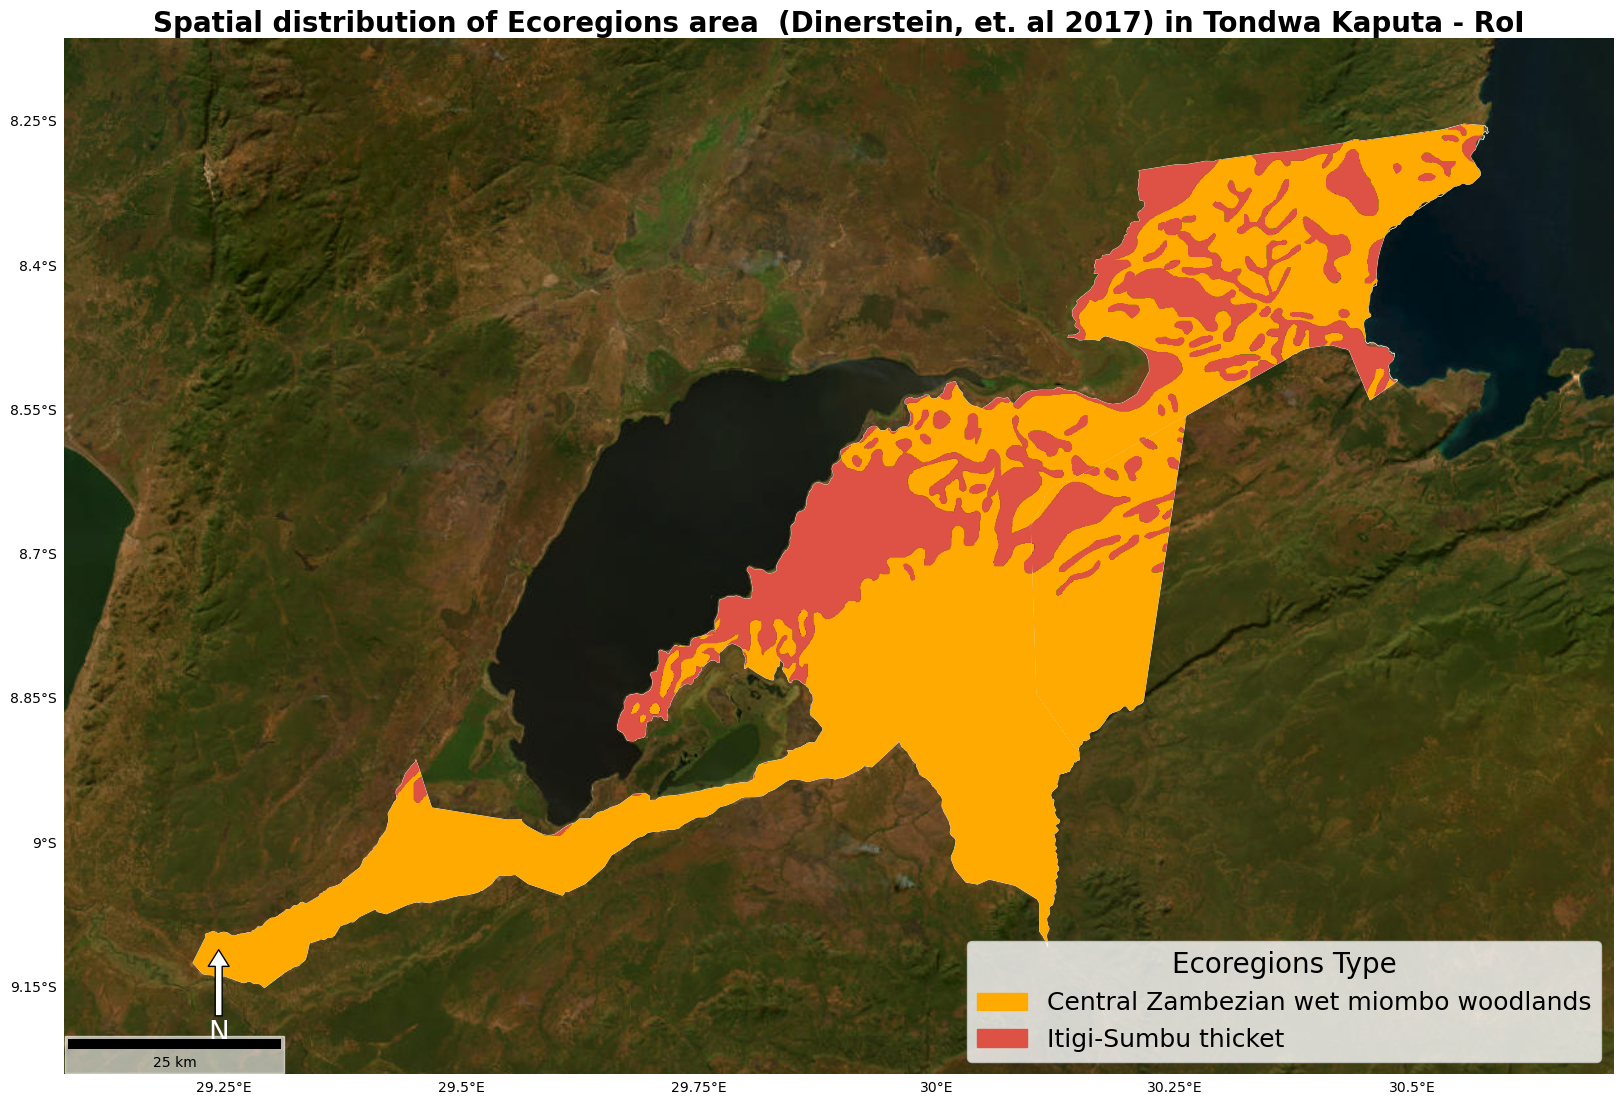

In [14]:
colors_ecoregions = biomes_ecoregions_roi_proj_4326['COLOR'].tolist()
colormap_ecoregions = LinearSegmentedColormap.from_list("Ecoregions_color", colors_ecoregions)
scheme_ecoregions = mc.UserDefined(biomes_ecoregions_roi_proj_4326['ECO_ID'], bins =biomes_ecoregions_roi_proj_4326['ECO_ID'].tolist())

fig_ecoregions = plt.figure(figsize=(30,30), facecolor = 'white', frameon=True)
ax_ecoregions = gplt.webmap(df=roi_proj_4326, projection=gcrs.WebMercator(),
                          provider=ctx.providers.Esri.WorldImagery, figsize=(20,20))
ax_ecoregions = gplt.polyplot(roi_proj_4326, projection = gcrs.WebMercator(), **roi_kwargs, ax = ax_ecoregions)
#ax_ecoregions = gplt.polyplot(mangrove_roi_proj_4326, projection = gcrs.WebMercator(), **mangrove_kwargs, ax = ax_ecoregions)

#ax_ecoregions = gplt.polyplot(biomes_ecoregions_roi_proj_4326, projection = gcrs.WebMercator(), ax = ax_ecoregions)
ax_ecoregions = gplt.choropleth(biomes_ecoregions_roi_proj_4326, hue='ECO_ID', projection=gcrs.WebMercator(), 
                              edgecolor = None, linewidth = 0.5, cmap=colormap_ecoregions,
                              legend=False, ax = ax_ecoregions,
                              #legend_kwargs={'frameon': True, 'framealpha' : 0.7, 'loc': 'lower right', 'fontsize' : 16, 'title':'Ecoregions type', 'title_fontsize' : 18},
                              #legend_labels=biomes_ecoregions_roi_proj_4326['ECO_NAME'].tolist(),
                              scheme = scheme_ecoregions
                               )
x, y, arrow_length = 0.1, 0.12, 0.08
ax_ecoregions.annotate('N', color='white', xy=(x, y), xytext=(x, y-arrow_length), arrowprops=dict(facecolor='white', width=5, headwidth=15),
                     ha='center', va='center', fontsize=20,
                     xycoords=ax_ecoregions.transAxes)

legend_ecoregions = ax_ecoregions.legend(handles=handles_list_ecoregions,facecolor="white", prop={'size': 18}, loc='lower right', title = "Ecoregions Type")
plt.setp(legend_ecoregions.get_title(),fontsize='20')

ax_ecoregions.add_artist(ScaleBar(1, box_alpha=0.6, location = 'lower left'))
ax_ecoregions = ax_ecoregions.gridlines(visible = None, draw_labels=True, dms=False, x_inline=False, y_inline=False)
ax_ecoregions.top_labels=False
ax_ecoregions.right_labels = False
plt.title("Spatial distribution of Ecoregions area  (Dinerstein, et. al 2017) in " +  projectname + " - RoI", va = 'center_baseline', fontsize=20, fontweight="bold")
plt.savefig(os.path.join(out_dir, projectname + '_EcoregionsDistribution_Map.png'), bbox_inches='tight', 
            facecolor=fig_ecoregions.get_facecolor())

C:\Users\FadliUwaisElqorni\.conda\envs\geemap\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning:

invalid value encountered in double_scalars



<Figure size 3000x3000 with 0 Axes>

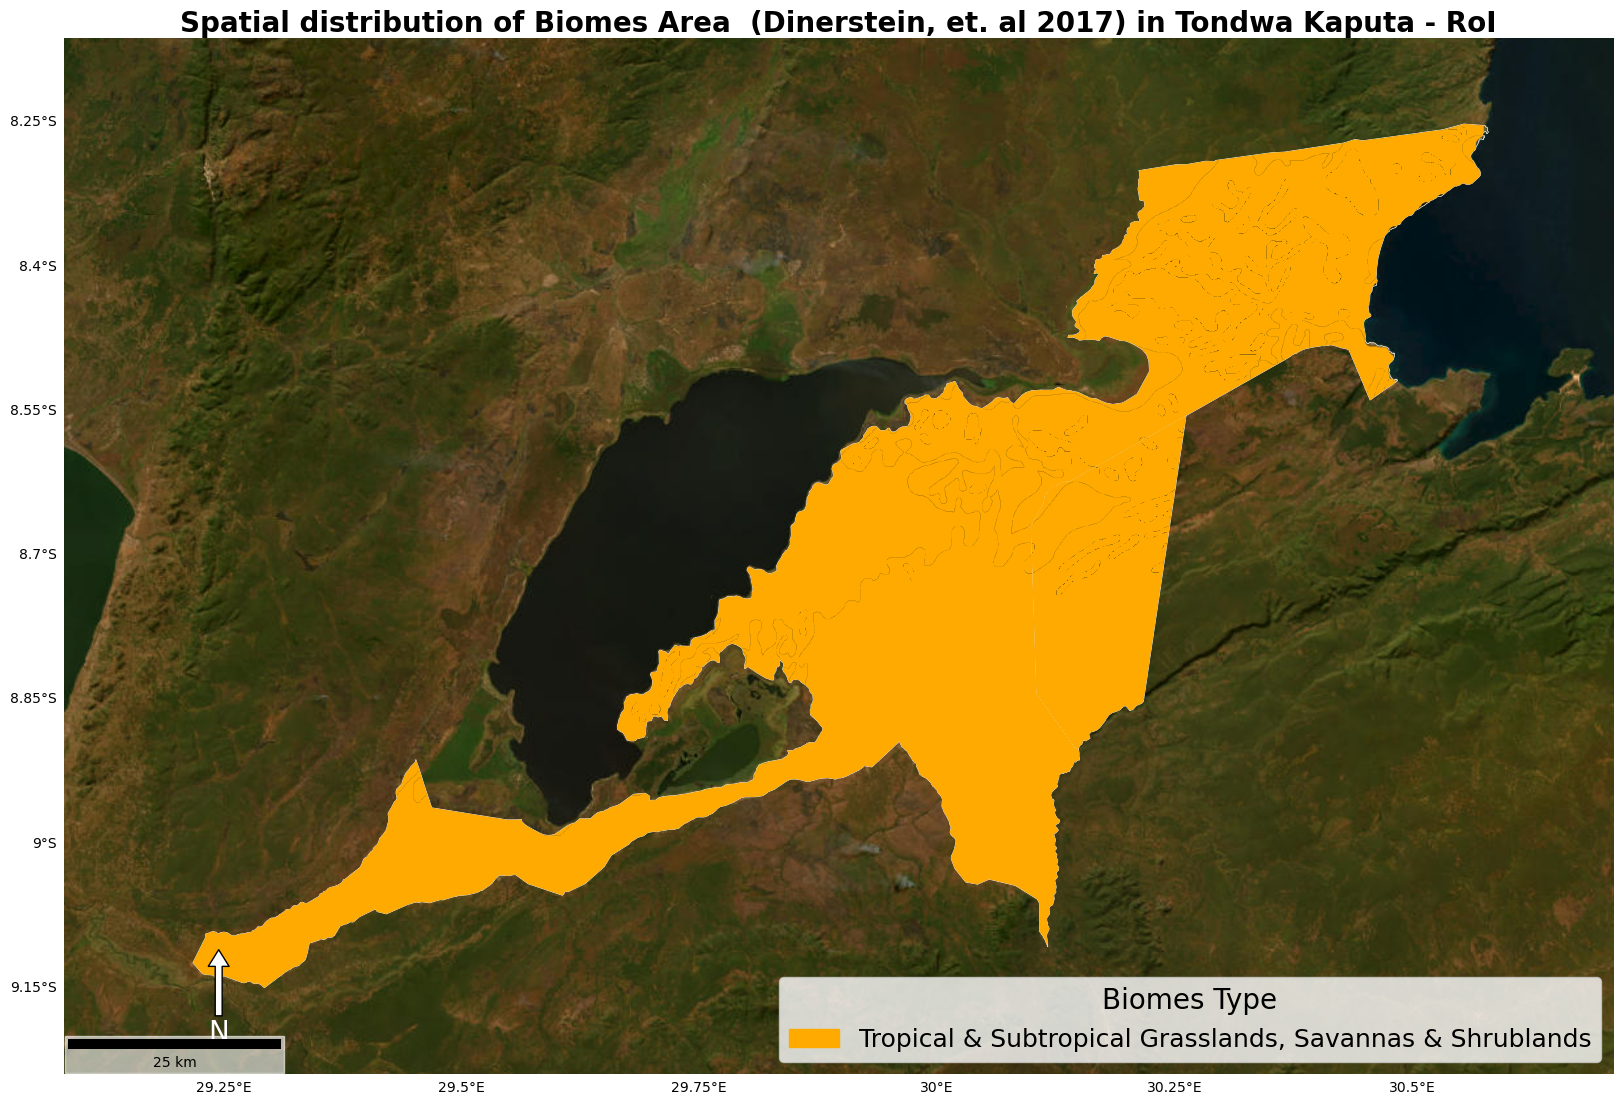

In [27]:
colors_biomes = biomes_ecoregions_roi_proj_4326['COLOR_BIO'].tolist()
colormap_biomes = LinearSegmentedColormap.from_list("Biomes_color", colors_biomes)
scheme_biomes = mc.UserDefined(biomes_ecoregions_roi_proj_4326['BIOME_NUM'], bins = biomes_ecoregions_roi_proj_4326['BIOME_NUM'].tolist())

fig_biomes = plt.figure(figsize=(30,30), facecolor = 'white', frameon=True)
ax_biomes = gplt.webmap(df=roi_proj_4326, projection=gcrs.WebMercator(),
                          provider=ctx.providers.Esri.WorldImagery, figsize=(20,20))
ax_biomes = gplt.polyplot(roi_proj_4326, projection = gcrs.WebMercator(), **roi_kwargs, ax = ax_biomes)
#ax_biomes = gplt.polyplot(mangrove_roi_proj_4326, projection = gcrs.WebMercator(), **mangrove_kwargs, ax = ax_biomes)

#ax_biomes = gplt.polyplot(biomes_ecoregions_roi_proj_4326, projection = gcrs.WebMercator(), ax = ax_biomes)
ax_biomes = gplt.choropleth(biomes_ecoregions_roi_proj_4326, hue='BIOME_NUM', projection=gcrs.WebMercator(), 
                              edgecolor = None, linewidth = 0.5, cmap=colormap_biomes,
                              legend=False, ax = ax_biomes,
                              #legend_kwargs={'frameon': True, 'framealpha' : 0.7, 'loc': 'lower right', 'fontsize' : 16, 'title':'Ecoregions type', 'title_fontsize' : 18},
                              #legend_labels=biomes_ecoregions_roi_proj_4326['BIOME_NAME'].tolist(),
                              scheme = scheme_ecoregions
                               )
x, y, arrow_length = 0.1, 0.12, 0.08
ax_biomes.annotate('N', color='white', xy=(x, y), xytext=(x, y-arrow_length), arrowprops=dict(facecolor='white', width=5, headwidth=15),
                     ha='center', va='center', fontsize=20,
                     xycoords=ax_biomes.transAxes)

legend_biomes = ax_biomes.legend(handles=handles_list_biomes,facecolor="white", prop={'size': 18}, loc='lower right', title = "Biomes Type")
plt.setp(legend_biomes.get_title(),fontsize='20')

ax_biomes.add_artist(ScaleBar(1, box_alpha=0.6, location = 'lower left'))
ax_biomes = ax_biomes.gridlines(visible = None, draw_labels=True, dms=False, x_inline=False, y_inline=False)
ax_biomes.top_labels=False
ax_biomes.right_labels = False
plt.title("Spatial distribution of Biomes Area  (Dinerstein, et. al 2017) in " +  projectname + " - RoI", va = 'center_baseline', fontsize=20, fontweight="bold")
plt.savefig(os.path.join(out_dir, projectname + '_BiomesDistribution_Map.png'), bbox_inches='tight', 
            facecolor=fig_biomes.get_facecolor())

In [24]:
legend_biome_df

biome_label biome_color
0  Tropical & Subtropical Grasslands, Savannas & ...     #FEAA01

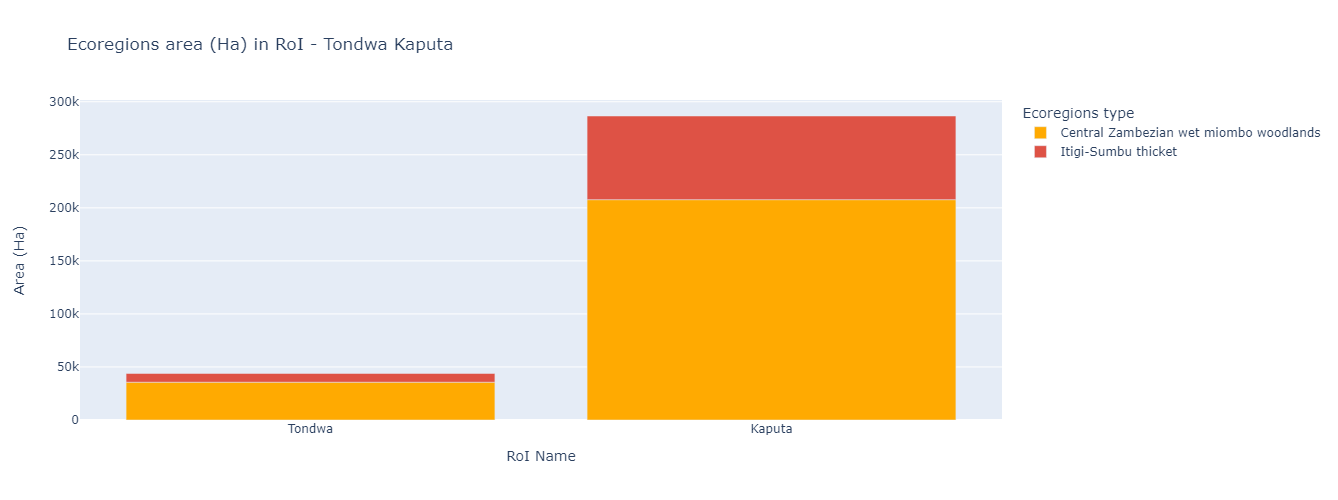

In [23]:
# 1. Ecoregions
# Mangrove area in RoI
fig_ecoregions_chart = px.bar(biomes_ecoregions_roi_proj[[roi_column_name, "ECO_NAME","Area_Ha"]], x = biomes_ecoregions_roi_proj[roi_column_name],
                      y =biomes_ecoregions_roi_proj.Area_Ha, color = 'ECO_NAME',
                      category_orders={"Ecoregions":legend_eco_df["eco_label"].tolist()},
                      color_discrete_sequence = legend_eco_df['eco_color'].tolist(),
                      width=1400, height=500, 
                      labels = {'x': "RoI Name", 'y': "Area (Ha)"},
                      title ="Ecoregions area (Ha) in RoI - " + projectname)
fig_ecoregions_chart.update_layout(legend_title_text='Ecoregions type')

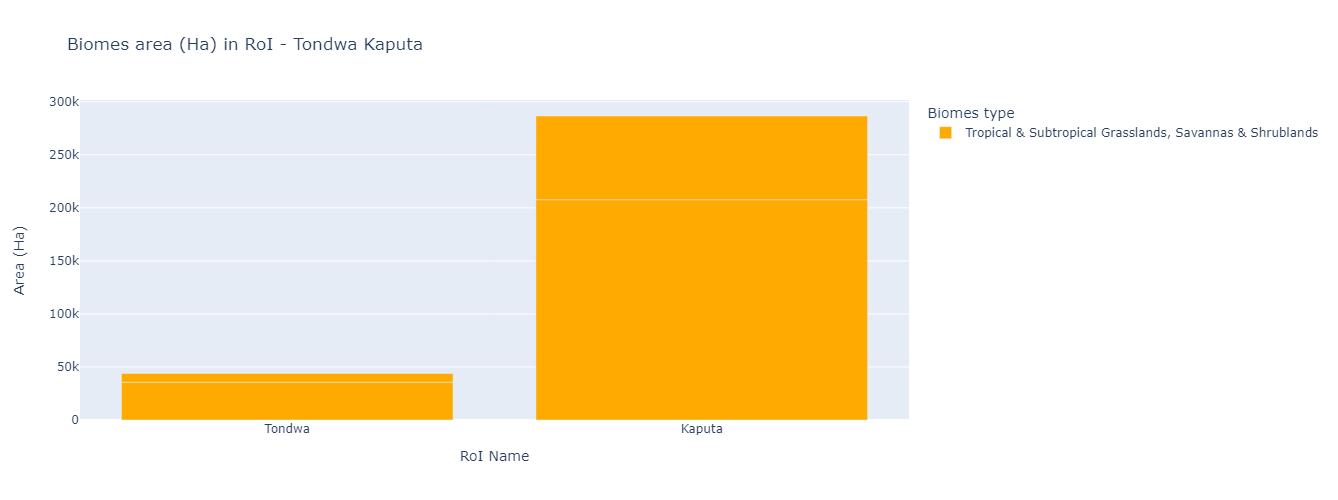

In [26]:
# 2. Biomes
# Mangrove area in RoI
fig_biomes_chart = px.bar( biomes_ecoregions_roi_proj[[roi_column_name, "BIOME_NAME","Area_Ha"]], x = biomes_ecoregions_roi_proj[roi_column_name],
                      y =biomes_ecoregions_roi_proj.Area_Ha, color = "BIOME_NAME",
                      category_orders={"Biomes":legend_biome_df["biome_label"].tolist()},
                      color_discrete_sequence = legend_biome_df['biome_color'].tolist(),
                      width=1400, height=500, 
                      labels = {'x': "RoI Name", 'y': "Area (Ha)"},
                      title ="Biomes area (Ha) in RoI - " + projectname)
fig_biomes_chart.update_layout(legend_title_text='Biomes type')

### Export Data

In [28]:
# 1. Biomes and Ecoregions csv
biomes_ecoregions_roi_proj_df = pd.DataFrame(biomes_ecoregions_roi_proj)
biomes_ecoregions_roi_proj_df = biomes_ecoregions_roi_proj_df.drop('geometry', axis =1 )
biomes_ecoregions_roi_proj_df.to_csv(os.path.join(out_dir, projectname + '_BiomesEcoregionsArea_RoI.csv'))

# 2. Biomes and Ecoregions shapefile
biomes_ecoregions_roi_proj.to_file(os.path.join(out_dir, projectname + 'BiomesEcoregions_RoI.shp'))

# 3. Biomes and Ecoregions Charts
fig_ecoregions_chart.write_image(os.path.join(out_dir, projectname + '_EcoregionsArea_roi.png'))
fig_biomes_chart.write_image(os.path.join(out_dir, projectname + '_BiomesArea_roi.png'))